In [1]:
install.packages("corrplot")
install.packages("gridExtra")
install.packages("arules")
install.packages("ggcorrplot")
install.packages("glmnet")

# https://www.datacamp.com/tutorial/pca-analysis-r
install.packages("FactoMineR")
install.packages("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘later’, ‘lazyeval’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’


Installing packa

In [2]:
library(ggplot2)
library(corrplot)
library(dplyr)
library(tidyverse)
library(gridExtra)
library(arules)
library(FactoMineR)
library(ggcorrplot)
library(factoextra)
library(glmnet)

corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attac

## **Quick Scan**

In [3]:
resto_train <- read.csv("retaurants_train.csv")

In [4]:
head(resto_train)

,income,star_ratings,accessibility,foot_traffic,neighborhood_quality,training_level,experience_years,employee_satisfaction,menu_diversity,seasonal_options,⋯,competitor_reviews,local_unemployment_rate,average_income,economic_growth_rate,order_processing_time,inventory_turnover,staff_turnover_rate,average_temperature,rainy_days,extreme_weather_events
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2136.448,5,37.34489,44.95796,44.07088,64.41865,55.93292,51.62804,74.73722,79.20753,⋯,56.09890,48.21429,41.68708,52.55938,70.45290,70.12286,74.44769,26.77499,24.43397,18.55834
2,2112.530,1,39.09190,52.90827,48.66811,63.19051,56.85675,73.84086,52.93501,41.50683,⋯,42.78368,70.41701,69.33555,70.44675,63.25544,56.32944,61.67200,33.86094,36.01871,38.85696
3,2290.919,1,68.91431,65.88830,74.66402,53.72949,61.48736,61.08770,43.80962,60.30270,⋯,43.49692,60.30573,65.84860,67.23194,72.05159,72.06142,54.28975,83.67191,86.63684,86.35718
4,2244.953,5,48.55105,46.11784,45.30144,65.96391,84.05165,71.04810,70.83447,73.68891,⋯,29.21758,62.98714,56.63763,53.65638,75.58566,76.55003,74.62213,60.52402,60.58135,63.72575
5,2083.266,1,49.64768,56.80178,61.46789,74.72683,77.98307,77.71728,43.36435,42.97658,⋯,60.07751,70.29733,69.94837,70.67046,59.06731,65.40691,71.33698,48.61204,52.86631,45.85181
6,2389.607,5,74.96720,71.73776,69.45325,84.02009,78.24449,75.42036,89.72601,87.13360,⋯,47.92035,55.94420,49.30467,59.81988,94.14962,80.83406,79.29263,33.41717,40.69029,25.23514


In [ ]:
str(resto_train)

'data.frame':	1000 obs. of  32 variables:
 $ income                 : num  2136 2113 2291 2245 2083 ...
 $ star_ratings           : int  5 1 1 5 1 5 4 1 4 3 ...
 $ accessibility          : num  37.3 39.1 68.9 48.6 49.6 ...
 $ foot_traffic           : num  45 52.9 65.9 46.1 56.8 ...
 $ neighborhood_quality   : num  44.1 48.7 74.7 45.3 61.5 ...
 $ training_level         : num  64.4 63.2 53.7 66 74.7 ...
 $ experience_years       : num  55.9 56.9 61.5 84.1 78 ...
 $ employee_satisfaction  : num  51.6 73.8 61.1 71 77.7 ...
 $ menu_diversity         : num  74.7 52.9 43.8 70.8 43.4 ...
 $ seasonal_options       : num  79.2 41.5 60.3 73.7 43 ...
 $ vegetarian_options     : num  76.6 44.9 45.4 66.5 38.9 ...
 $ value_for_money        : num  42.8 70 85.2 68.7 55.1 ...
 $ presence_of_promos     : num  49.5 65.1 65.1 65 56.7 ...
 $ pricing_flexibility    : num  46.8 62.2 71.8 67 58.7 ...
 $ ad_spend               : num  68.5 51.9 78 10.7 42.8 ...
 $ social_media_engagement: num  65 52.3 75.6 24.6 

In [ ]:
# Check dataframe dimensions
dim(resto_train)

[1] 1000   32

In [ ]:
colSums(is.na(resto_train))

income            star_ratings           accessibility 
                      0                       0                       0 
           foot_traffic    neighborhood_quality          training_level 
                      0                       0                       0 
       experience_years   employee_satisfaction          menu_diversity 
                      0                       0                       0 
       seasonal_options      vegetarian_options         value_for_money 
                      0                       0                       0 
     presence_of_promos     pricing_flexibility                ad_spend 
                      0                       0                       0 
social_media_engagement       local_advertising          review_ratings 
                      0                       0                       0 
       repeat_customers          complaint_rate      competitor_density 
                      0                       0                       0 
      competitor_promos      competitor_reviews local_unemployment_rate 
                      0                       0                       0 
         average_income    economic_growth_rate   order_processing_time 
                      0                       0                       0 
     inventory_turnover     staff_turnover_rate     average_temperature 
                      0                       0                       0 
             rainy_days  extreme_weather_events 
                      0                       0

In [ ]:
colnames(resto_train)

[1] "income"                  "star_ratings"           
 [3] "accessibility"           "foot_traffic"           
 [5] "neighborhood_quality"    "training_level"         
 [7] "experience_years"        "employee_satisfaction"  
 [9] "menu_diversity"          "seasonal_options"       
[11] "vegetarian_options"      "value_for_money"        
[13] "presence_of_promos"      "pricing_flexibility"    
[15] "ad_spend"                "social_media_engagement"
[17] "local_advertising"       "review_ratings"         
[19] "repeat_customers"        "complaint_rate"         
[21] "competitor_density"      "competitor_promos"      
[23] "competitor_reviews"      "local_unemployment_rate"
[25] "average_income"          "economic_growth_rate"   
[27] "order_processing_time"   "inventory_turnover"     
[29] "staff_turnover_rate"     "average_temperature"    
[31] "rainy_days"              "extreme_weather_events"

# **Exploratory Data Analysis**

In [ ]:
dQuote(colnames(resto_train))[3:32]

[1] "“accessibility”"           "“foot_traffic”"           
 [3] "“neighborhood_quality”"    "“training_level”"         
 [5] "“experience_years”"        "“employee_satisfaction”"  
 [7] "“menu_diversity”"          "“seasonal_options”"       
 [9] "“vegetarian_options”"      "“value_for_money”"        
[11] "“presence_of_promos”"      "“pricing_flexibility”"    
[13] "“ad_spend”"                "“social_media_engagement”"
[15] "“local_advertising”"       "“review_ratings”"         
[17] "“repeat_customers”"        "“complaint_rate”"         
[19] "“competitor_density”"      "“competitor_promos”"      
[21] "“competitor_reviews”"      "“local_unemployment_rate”"
[23] "“average_income”"          "“economic_growth_rate”"   
[25] "“order_processing_time”"   "“inventory_turnover”"     
[27] "“staff_turnover_rate”"     "“average_temperature”"    
[29] "“rainy_days”"              "“extreme_weather_events”"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

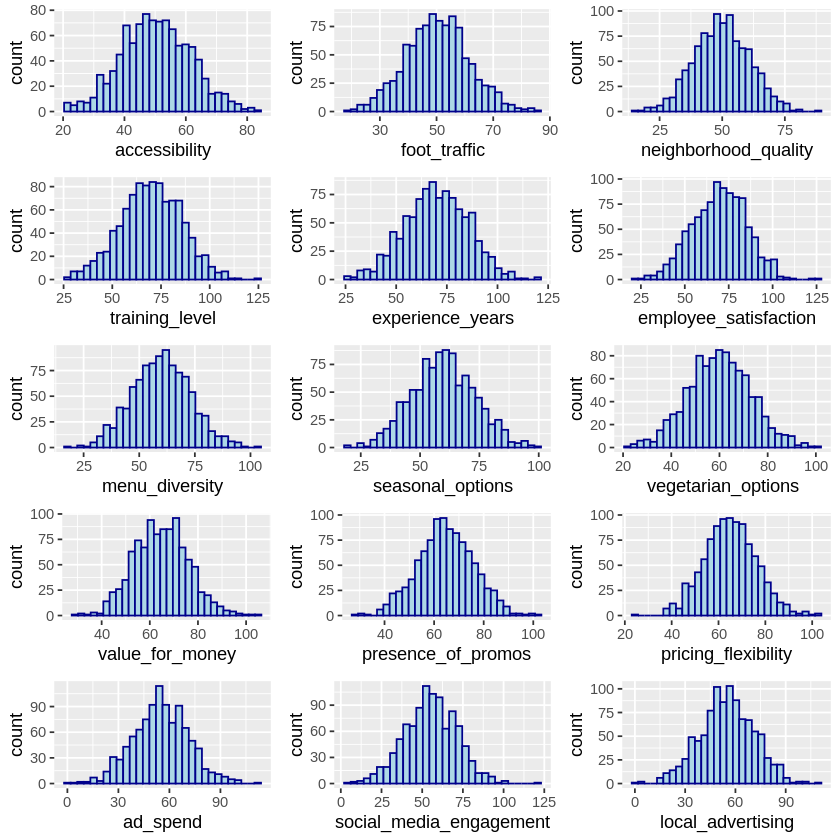

In [ ]:
p1 <- ggplot(resto_train, aes(x=accessibility)) + geom_histogram(color="darkblue", fill="lightblue")
p2 <- ggplot(resto_train, aes(x=foot_traffic)) + geom_histogram(color="darkblue", fill="lightblue")
p3 <- ggplot(resto_train, aes(x=neighborhood_quality)) + geom_histogram(color="darkblue", fill="lightblue")
p4 <- ggplot(resto_train, aes(x=training_level)) + geom_histogram(color="darkblue", fill="lightblue")
p5 <- ggplot(resto_train, aes(x=experience_years)) + geom_histogram(color="darkblue", fill="lightblue")
p6 <- ggplot(resto_train, aes(x=employee_satisfaction)) + geom_histogram(color="darkblue", fill="lightblue")
p7 <- ggplot(resto_train, aes(x=menu_diversity)) + geom_histogram(color="darkblue", fill="lightblue")
p8 <- ggplot(resto_train, aes(x=seasonal_options)) + geom_histogram(color="darkblue", fill="lightblue")
p9 <- ggplot(resto_train, aes(x=vegetarian_options)) + geom_histogram(color="darkblue", fill="lightblue")
p10 <- ggplot(resto_train, aes(x=value_for_money)) + geom_histogram(color="darkblue", fill="lightblue")
p11 <- ggplot(resto_train, aes(x=presence_of_promos)) + geom_histogram(color="darkblue", fill="lightblue")
p12 <- ggplot(resto_train, aes(x=pricing_flexibility)) + geom_histogram(color="darkblue", fill="lightblue")
p13 <- ggplot(resto_train, aes(x=ad_spend)) + geom_histogram(color="darkblue", fill="lightblue")
p14 <- ggplot(resto_train, aes(x=social_media_engagement)) + geom_histogram(color="darkblue", fill="lightblue")
p15 <- ggplot(resto_train, aes(x=local_advertising)) + geom_histogram(color="darkblue", fill="lightblue")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, nrow = 5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

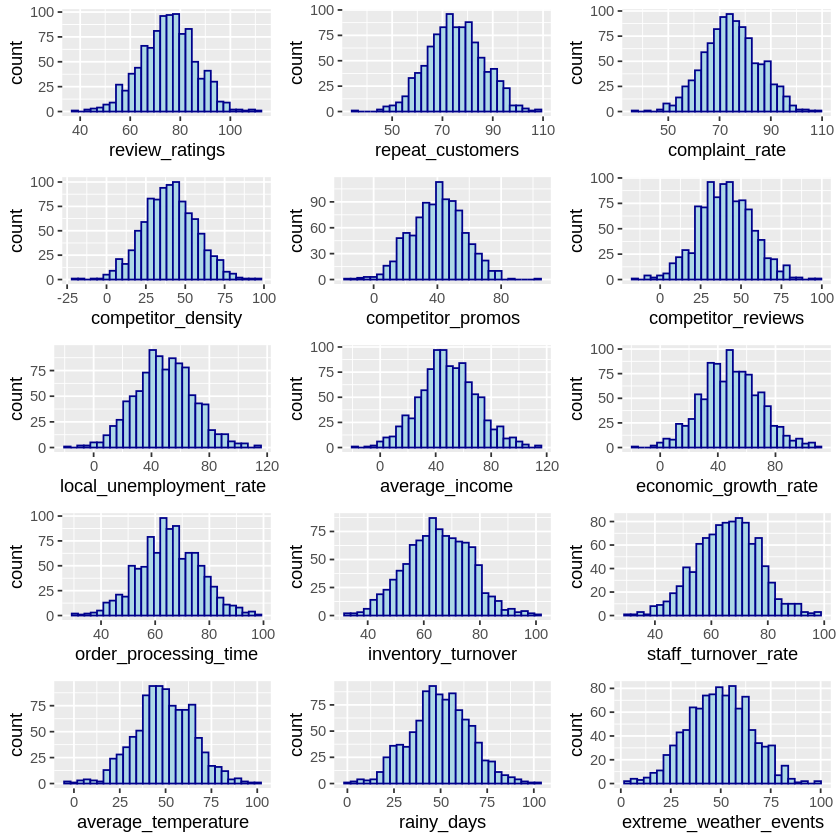

In [ ]:
p1 <- ggplot(resto_train, aes(x=review_ratings)) + geom_histogram(color="darkblue", fill="lightblue")
p2 <- ggplot(resto_train, aes(x=repeat_customers)) + geom_histogram(color="darkblue", fill="lightblue")
p3 <- ggplot(resto_train, aes(x=complaint_rate)) + geom_histogram(color="darkblue", fill="lightblue")
p4 <- ggplot(resto_train, aes(x=competitor_density)) + geom_histogram(color="darkblue", fill="lightblue")
p5 <- ggplot(resto_train, aes(x=competitor_promos)) + geom_histogram(color="darkblue", fill="lightblue")
p6 <- ggplot(resto_train, aes(x=competitor_reviews)) + geom_histogram(color="darkblue", fill="lightblue")
p7 <- ggplot(resto_train, aes(x=local_unemployment_rate)) + geom_histogram(color="darkblue", fill="lightblue")
p8 <- ggplot(resto_train, aes(x=average_income)) + geom_histogram(color="darkblue", fill="lightblue")
p9 <- ggplot(resto_train, aes(x=economic_growth_rate)) + geom_histogram(color="darkblue", fill="lightblue")
p10 <- ggplot(resto_train, aes(x=order_processing_time)) + geom_histogram(color="darkblue", fill="lightblue")
p11 <- ggplot(resto_train, aes(x=inventory_turnover)) + geom_histogram(color="darkblue", fill="lightblue")
p12 <- ggplot(resto_train, aes(x=staff_turnover_rate)) + geom_histogram(color="darkblue", fill="lightblue")
p13 <- ggplot(resto_train, aes(x=average_temperature)) + geom_histogram(color="darkblue", fill="lightblue")
p14 <- ggplot(resto_train, aes(x=rainy_days)) + geom_histogram(color="darkblue", fill="lightblue")
p15 <- ggplot(resto_train, aes(x=extreme_weather_events)) + geom_histogram(color="darkblue", fill="lightblue")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, nrow = 5)

In [ ]:
# Calculate the correlation of each feature with the target variable
correlations <- sapply(resto_train %>% select(-income, -star_ratings), function(x) cor(x, resto_train$income, use = "complete.obs"))

# Create a dataframe with the results
cor_df <- data.frame(feature = names(correlations), correlation = correlations)
cor_df_sorted <- cor_df %>% arrange(desc(correlation))

cor_df_sorted

,feature,correlation
,<chr>,<dbl>
training_level,training_level,0.47928725
experience_years,experience_years,0.46397661
employee_satisfaction,employee_satisfaction,0.45822476
review_ratings,review_ratings,0.37381988
economic_growth_rate,economic_growth_rate,0.35322708
local_unemployment_rate,local_unemployment_rate,0.35160749
repeat_customers,repeat_customers,0.35095716
complaint_rate,complaint_rate,0.34092469
average_income,average_income,0.33430151


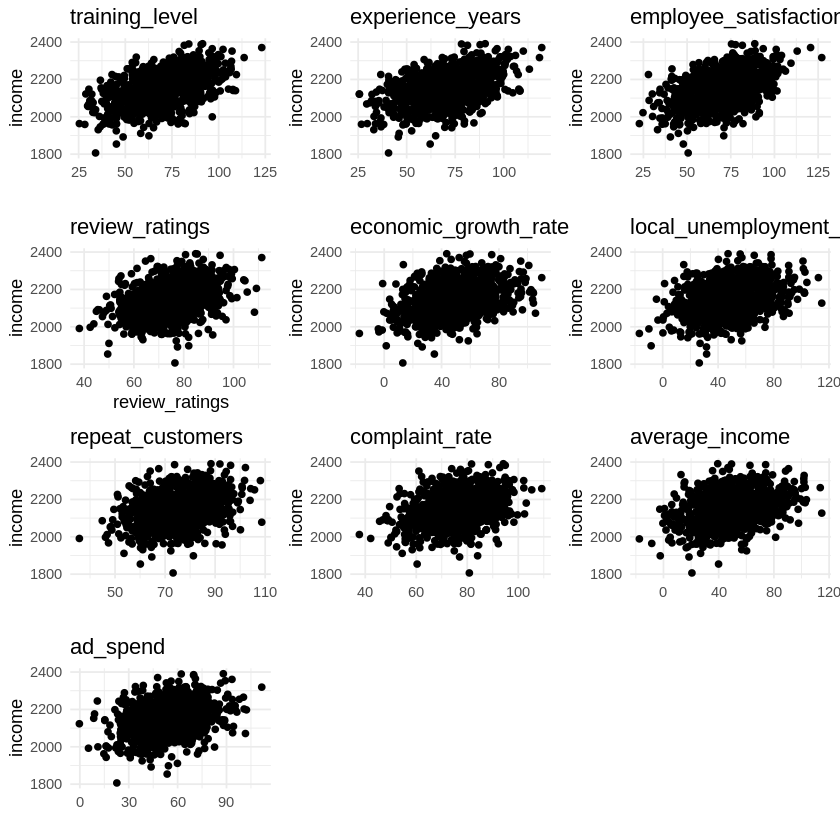

In [ ]:
# Data visualization for the predictor variables' relationship with the output variable
p1 <- ggplot(resto_train, aes(x = training_level, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "training_level", x="")

p2 <- ggplot(resto_train, aes(x = experience_years, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "experience_years", x="")

p3 <- ggplot(resto_train, aes(x = employee_satisfaction, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "employee_satisfaction", x="")

p4 <- ggplot(resto_train, aes(x = review_ratings, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "review_ratings")

p5 <- ggplot(resto_train, aes(x = economic_growth_rate, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "economic_growth_rate", x="")

p6 <- ggplot(resto_train, aes(x = local_unemployment_rate, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "local_unemployment_rate", x="")

p7 <- ggplot(resto_train, aes(x = repeat_customers, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "repeat_customers", x="")

p8 <- ggplot(resto_train, aes(x = complaint_rate, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "complaint_rate", x="")

p9 <- ggplot(resto_train, aes(x = average_income, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "average_income", x="")

p10 <- ggplot(resto_train, aes(x = ad_spend, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "ad_spend", x="")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, nrow = 4)

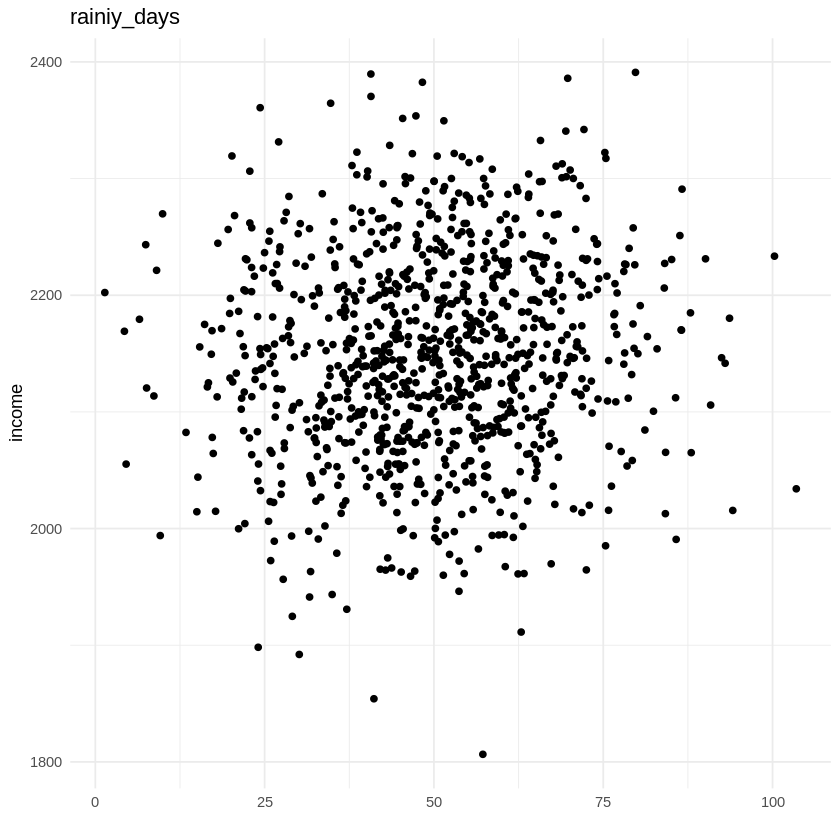

In [ ]:
ggplot(resto_train, aes(x = rainy_days, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "rainiy_days", x="")

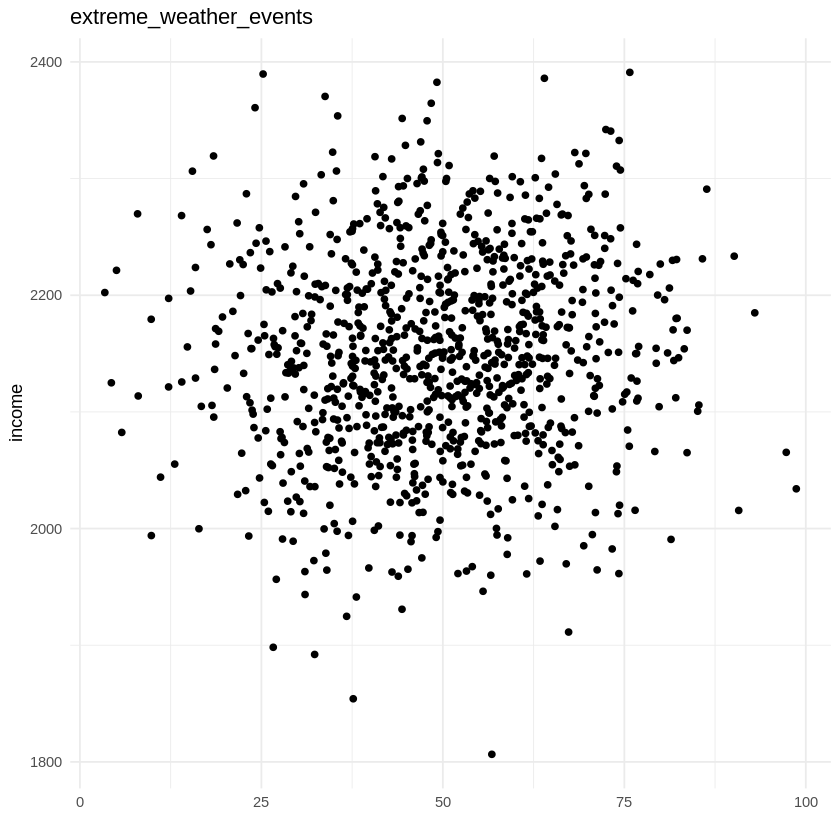

In [ ]:
ggplot(resto_train, aes(x = extreme_weather_events, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "extreme_weather_events", x="")

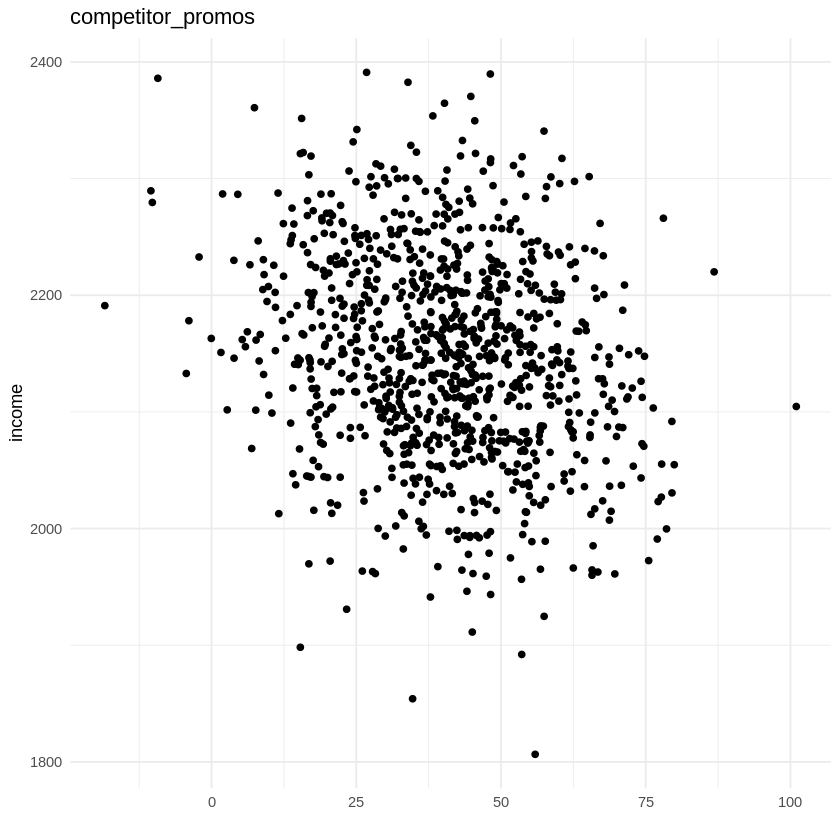

In [ ]:
ggplot(resto_train, aes(x = competitor_promos, y = income)) +
   geom_point() +
   theme_minimal() +
   labs(title = "competitor_promos", x="")

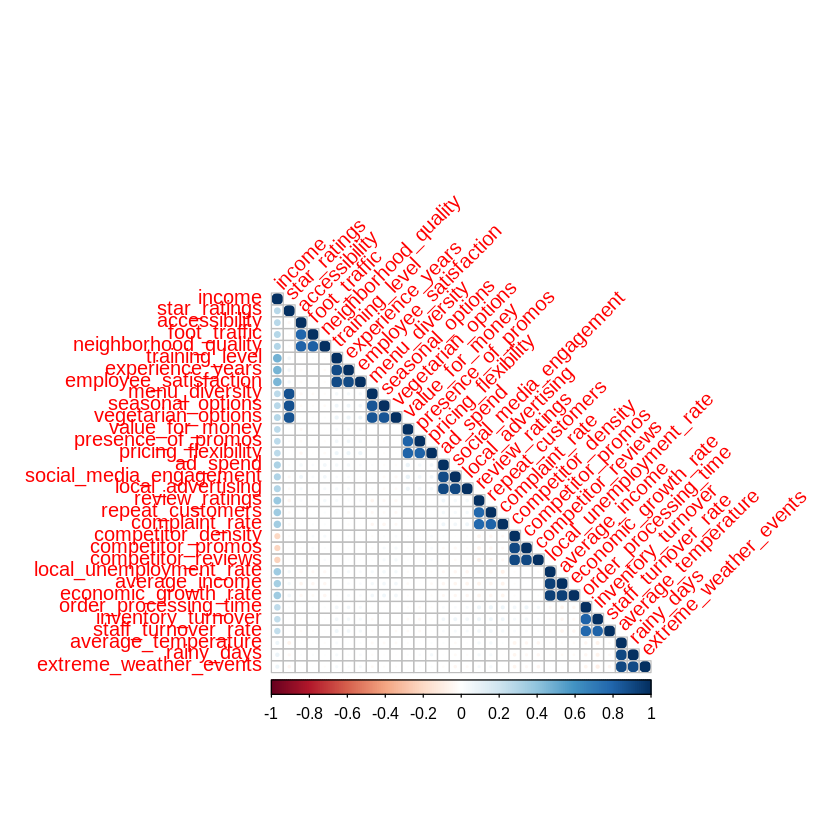

In [ ]:
# Correlation matrix

# Get only the numeric columns
corr <- round(cor(resto_train), 4)
corrplot(corr, tl.col = "red", tl.srt = 45, bg = "White",
         type = "lower")

In [ ]:
colnames(resto_train)[3:32]

[1] "accessibility"           "foot_traffic"           
 [3] "neighborhood_quality"    "training_level"         
 [5] "experience_years"        "employee_satisfaction"  
 [7] "menu_diversity"          "seasonal_options"       
 [9] "vegetarian_options"      "value_for_money"        
[11] "presence_of_promos"      "pricing_flexibility"    
[13] "ad_spend"                "social_media_engagement"
[15] "local_advertising"       "review_ratings"         
[17] "repeat_customers"        "complaint_rate"         
[19] "competitor_density"      "competitor_promos"      
[21] "competitor_reviews"      "local_unemployment_rate"
[23] "average_income"          "economic_growth_rate"   
[25] "order_processing_time"   "inventory_turnover"     
[27] "staff_turnover_rate"     "average_temperature"    
[29] "rainy_days"              "extreme_weather_events"

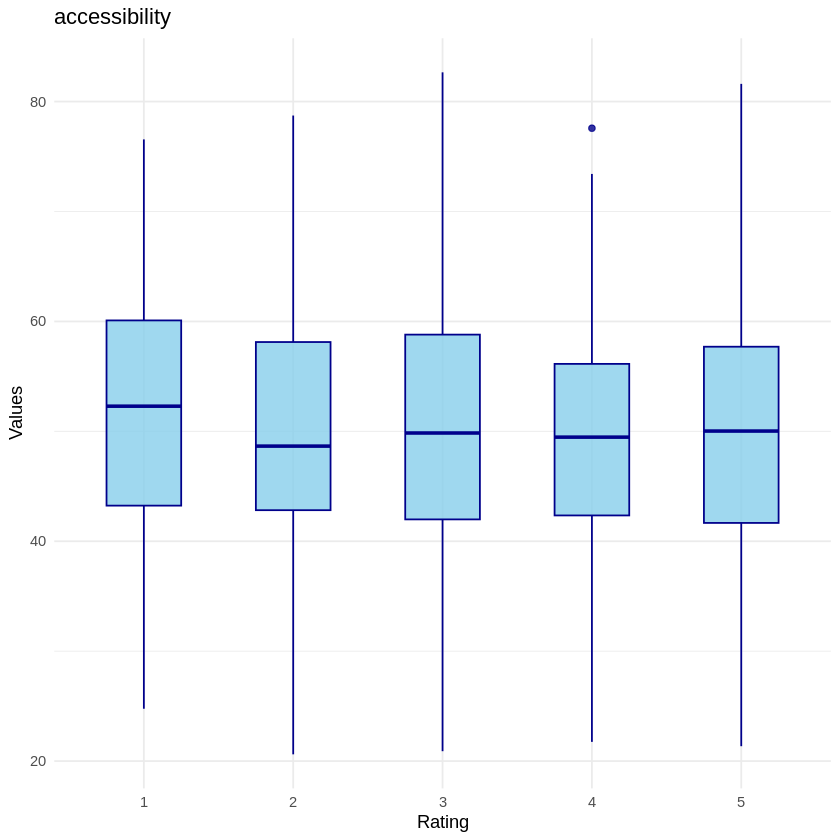

In [ ]:
p1 <- ggplot(resto_train, aes(x = factor(star_ratings), y = accessibility)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "accessibility")
p1

[1] 3

In [ ]:
for(col in colnames(resto_train)[3:17]){
  cat('p', which(colnames(resto_train)==col)-2, ' <- ggplot(resto_train, aes(x = factor(star_ratings), y = ', col, ')) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "', col, '")\n\n', sep = "")
}

p1 <- ggplot(resto_train, aes(x = factor(star_ratings), y = accessibility)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "accessibility")

p2 <- ggplot(resto_train, aes(x = factor(star_ratings), y = foot_traffic)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "foot_traffic")

p3 <- ggplot(resto_train, aes(x = factor(star_ratings), y = neighborhood_quality)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "neighborhood_quality")

p4 <- ggplot(resto_train, aes(x = factor(star_ratings), y = training_level)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "training

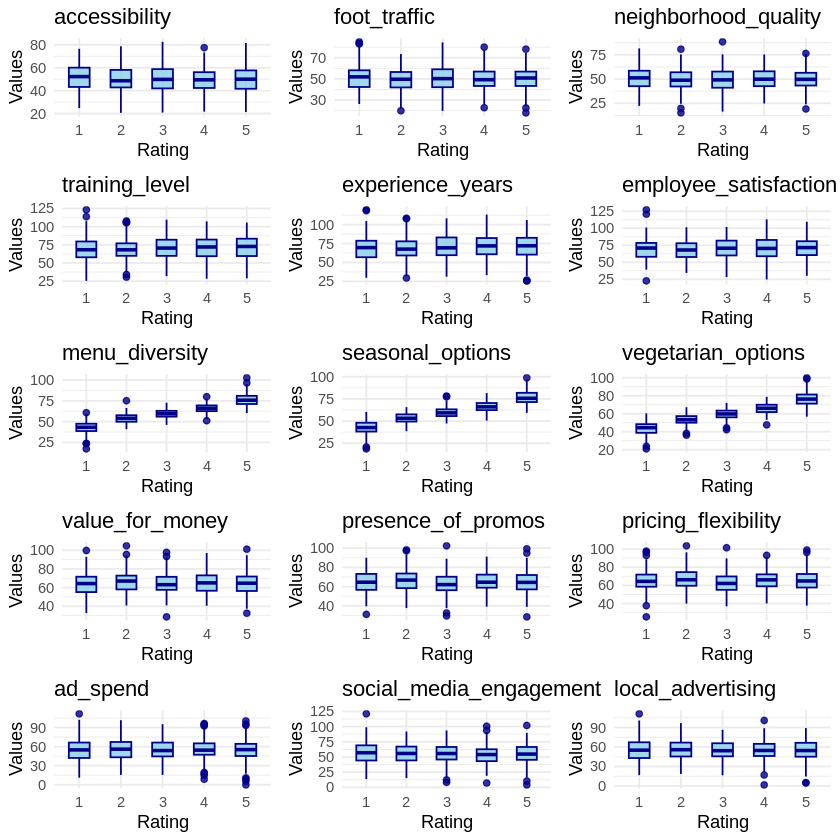

In [ ]:
p1 <- ggplot(resto_train, aes(x = factor(star_ratings), y = accessibility)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "accessibility")

p2 <- ggplot(resto_train, aes(x = factor(star_ratings), y = foot_traffic)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "foot_traffic")

p3 <- ggplot(resto_train, aes(x = factor(star_ratings), y = neighborhood_quality)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "neighborhood_quality")

p4 <- ggplot(resto_train, aes(x = factor(star_ratings), y = training_level)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "training_level")

p5 <- ggplot(resto_train, aes(x = factor(star_ratings), y = experience_years)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "experience_years")

p6 <- ggplot(resto_train, aes(x = factor(star_ratings), y = employee_satisfaction)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "employee_satisfaction")

p7 <- ggplot(resto_train, aes(x = factor(star_ratings), y = menu_diversity)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "menu_diversity")

p8 <- ggplot(resto_train, aes(x = factor(star_ratings), y = seasonal_options)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "seasonal_options")

p9 <- ggplot(resto_train, aes(x = factor(star_ratings), y = vegetarian_options)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "vegetarian_options")

p10 <- ggplot(resto_train, aes(x = factor(star_ratings), y = value_for_money)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "value_for_money")

p11 <- ggplot(resto_train, aes(x = factor(star_ratings), y = presence_of_promos)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "presence_of_promos")

p12 <- ggplot(resto_train, aes(x = factor(star_ratings), y = pricing_flexibility)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "pricing_flexibility")

p13 <- ggplot(resto_train, aes(x = factor(star_ratings), y = ad_spend)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "ad_spend")

p14 <- ggplot(resto_train, aes(x = factor(star_ratings), y = social_media_engagement)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "social_media_engagement")

p15 <- ggplot(resto_train, aes(x = factor(star_ratings), y = local_advertising)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "local_advertising")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, nrow = 5, heights=rep(5, 5))

In [ ]:
for(col in colnames(resto_train)[18:32]){
  cat('p', which(colnames(resto_train)==col)-17, ' <- ggplot(resto_train, aes(x = factor(star_ratings), y = ', col, ')) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "', col, '")\n\n', sep = "")
}

p1 <- ggplot(resto_train, aes(x = factor(star_ratings), y = review_ratings)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "review_ratings")

p2 <- ggplot(resto_train, aes(x = factor(star_ratings), y = repeat_customers)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "repeat_customers")

p3 <- ggplot(resto_train, aes(x = factor(star_ratings), y = complaint_rate)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "complaint_rate")

p4 <- ggplot(resto_train, aes(x = factor(star_ratings), y = competitor_density)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "compet

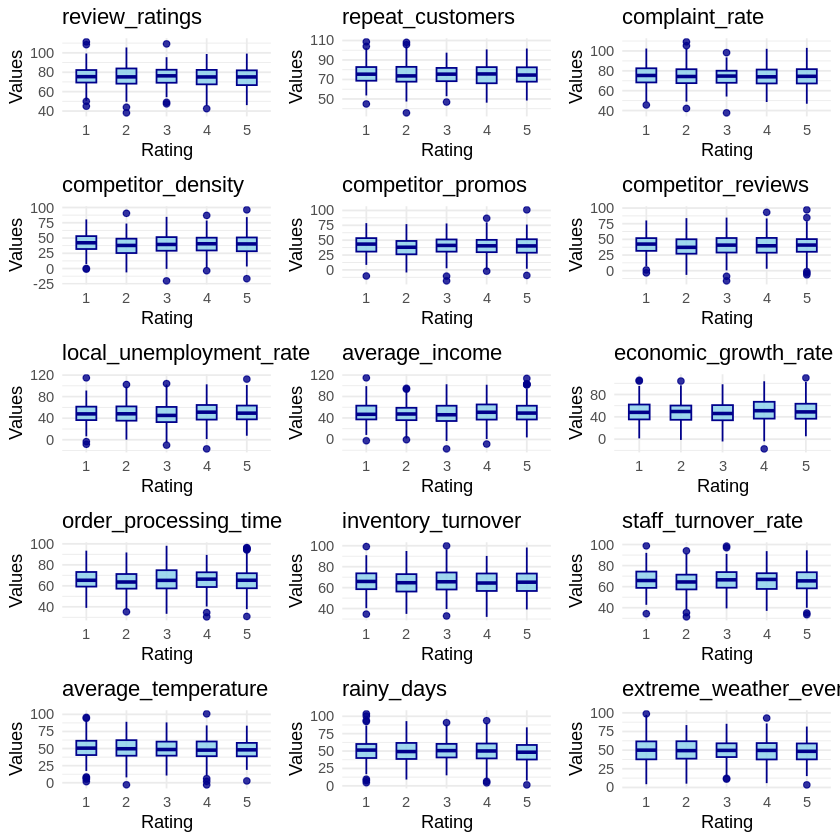

In [ ]:
p1 <- ggplot(resto_train, aes(x = factor(star_ratings), y = review_ratings)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "review_ratings")

p2 <- ggplot(resto_train, aes(x = factor(star_ratings), y = repeat_customers)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "repeat_customers")

p3 <- ggplot(resto_train, aes(x = factor(star_ratings), y = complaint_rate)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "complaint_rate")

p4 <- ggplot(resto_train, aes(x = factor(star_ratings), y = competitor_density)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "competitor_density")

p5 <- ggplot(resto_train, aes(x = factor(star_ratings), y = competitor_promos)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "competitor_promos")

p6 <- ggplot(resto_train, aes(x = factor(star_ratings), y = competitor_reviews)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "competitor_reviews")

p7 <- ggplot(resto_train, aes(x = factor(star_ratings), y = local_unemployment_rate)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "local_unemployment_rate")

p8 <- ggplot(resto_train, aes(x = factor(star_ratings), y = average_income)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "average_income")

p9 <- ggplot(resto_train, aes(x = factor(star_ratings), y = economic_growth_rate)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "economic_growth_rate")

p10 <- ggplot(resto_train, aes(x = factor(star_ratings), y = order_processing_time)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "order_processing_time")

p11 <- ggplot(resto_train, aes(x = factor(star_ratings), y = inventory_turnover)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "inventory_turnover")

p12 <- ggplot(resto_train, aes(x = factor(star_ratings), y = staff_turnover_rate)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "staff_turnover_rate")

p13 <- ggplot(resto_train, aes(x = factor(star_ratings), y = average_temperature)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "average_temperature")

p14 <- ggplot(resto_train, aes(x = factor(star_ratings), y = rainy_days)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "rainy_days")

p15 <- ggplot(resto_train, aes(x = factor(star_ratings), y = extreme_weather_events)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", alpha = 0.8, width = 0.5) +
  labs(x = "Rating", y = "Values") +
  theme_minimal() +
  labs(title = "extreme_weather_events")

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, nrow = 5, heights=rep(5, 5))


## **Association Rules**

In [ ]:
set.seed(16)
assoc_rules <- apriori(data = resto_train,
                       parameter = list(support = 0.1, confidence = 0.2))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[96 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [96 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.02s].
writing ... [9761 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
assoc_rules

set of 9761 rules 

In [ ]:
rules <- inspect(sort(assoc_rules, by = 'lift')[1:20])
rules

     lhs                                      rhs                                   support confidence coverage     lift count
[1]  {menu_diversity=[17.2,54.3),                                                                                             
      seasonal_options=[18.6,53.9),                                                                                           
      vegetarian_options=[20.9,54.1)}      => {star_ratings=[1,2)}                    0.175  0.8064516    0.217 4.052521   175
[2]  {menu_diversity=[17.2,54.3),                                                                                             
      vegetarian_options=[20.9,54.1)}      => {star_ratings=[1,2)}                    0.180  0.7346939    0.245 3.691929   180
[3]  {menu_diversity=[17.2,54.3),                                                                                             
      seasonal_options=[18.6,53.9)}        => {star_ratings=[1,2)}                    0.188  0.7286822    0.258

NULL

## **Dimensionality Reduction**

In [ ]:
feats <- resto_train %>%
   select(-income, -star_ratings, -menu_diversity, -vegetarian_options)

In [ ]:
head(feats)

,accessibility,foot_traffic,neighborhood_quality,training_level,experience_years,employee_satisfaction,seasonal_options,value_for_money,presence_of_promos,pricing_flexibility,⋯,competitor_reviews,local_unemployment_rate,average_income,economic_growth_rate,order_processing_time,inventory_turnover,staff_turnover_rate,average_temperature,rainy_days,extreme_weather_events
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,37.34489,44.95796,44.07088,64.41865,55.93292,51.62804,79.20753,42.78886,49.52771,46.83480,⋯,56.09890,48.21429,41.68708,52.55938,70.45290,70.12286,74.44769,26.77499,24.43397,18.55834
2,39.09190,52.90827,48.66811,63.19051,56.85675,73.84086,41.50683,69.95361,65.07460,62.22169,⋯,42.78368,70.41701,69.33555,70.44675,63.25544,56.32944,61.67200,33.86094,36.01871,38.85696
3,68.91431,65.88830,74.66402,53.72949,61.48736,61.08770,60.30270,85.15341,65.08285,71.78966,⋯,43.49692,60.30573,65.84860,67.23194,72.05159,72.06142,54.28975,83.67191,86.63684,86.35718
4,48.55105,46.11784,45.30144,65.96391,84.05165,71.04810,73.68891,68.65101,65.00629,67.04376,⋯,29.21758,62.98714,56.63763,53.65638,75.58566,76.55003,74.62213,60.52402,60.58135,63.72575
5,49.64768,56.80178,61.46789,74.72683,77.98307,77.71728,42.97658,55.05537,56.67751,58.69537,⋯,60.07751,70.29733,69.94837,70.67046,59.06731,65.40691,71.33698,48.61204,52.86631,45.85181
6,74.96720,71.73776,69.45325,84.02009,78.24449,75.42036,87.13360,79.75782,74.45989,70.05747,⋯,47.92035,55.94420,49.30467,59.81988,94.14962,80.83406,79.29263,33.41717,40.69029,25.23514


In [ ]:
# Normalize the data
norm_feats <- scale(feats)

In [ ]:
head(norm_feats)

accessibility,foot_traffic,neighborhood_quality,training_level,experience_years,employee_satisfaction,seasonal_options,value_for_money,presence_of_promos,pricing_flexibility,⋯,competitor_reviews,local_unemployment_rate,average_income,economic_growth_rate,order_processing_time,inventory_turnover,staff_turnover_rate,average_temperature,rainy_days,extreme_weather_events
-1.15393868,-0.4780955,-0.5324267,-0.3459093,-0.8923134,-1.1861136,1.450667,-1.9511883,-1.34695684,-1.6345367,⋯,0.9581182,-0.03959178,-0.366361177,0.1723009,0.4649527,0.43551298,0.7938365,-1.42693208,-1.5683990,-1.9500269
-0.99879593,0.2325898,-0.1140281,-0.4242423,-0.8331957,0.2614707,-1.369967,0.4584871,0.02956255,-0.2512043,⋯,0.1524032,1.05914334,0.987355936,1.0602363,-0.1795819,-0.78208572,-0.3639170,-0.97862428,-0.8510484,-0.6645442
1.64958040,1.3928853,2.2518877,-1.0276831,-0.5368736,-0.5696383,0.036274,1.8068005,0.03029236,0.6089878,⋯,0.1955620,0.55877109,0.816628694,0.9006519,0.6081156,0.60663736,-1.0329078,2.17277349,2.2833295,2.3435770
-0.15877692,-0.3744124,-0.4204320,-0.2473502,0.9070593,0.0794700,1.037783,0.3429386,0.02351377,0.1823160,⋯,-0.6684925,0.69146509,0.365643747,0.2267564,0.9245922,1.00286393,0.8096448,0.70827289,0.6699204,0.9103610
-0.06139048,0.5806341,1.0508939,0.3115651,0.5187195,0.5140925,-1.260005,-0.8630763,-0.71391483,-0.5682326,⋯,1.1988673,1.05322055,1.017360743,1.0713411,-0.5546305,0.01921823,0.5119385,-0.04536431,0.1921895,-0.2215701
2.18710673,1.9157736,1.7776502,0.9043061,0.5354482,0.3644050,2.043667,1.3281787,0.86053438,0.4532586,⋯,0.4632274,0.34293445,0.006608967,0.5327149,2.5869992,1.38103248,1.2328924,-1.00669997,-0.5617745,-1.5271946


In [ ]:
data.pca <- princomp(norm_feats)
summary(data.pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8137288 1.7580814 1.7429810 1.66090317 1.65104291
Proportion of Variance 0.1097635 0.1031315 0.1013675 0.09204536 0.09095571
Cumulative Proportion  0.1097635 0.2128950 0.3142624 0.40630779 0.49726350
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.62181194 1.60017249 1.57349616 1.53999243 1.49511282
Proportion of Variance 0.08776356 0.08543717 0.08261228 0.07913169 0.07458666
Cumulative Proportion  0.58502706 0.67046423 0.75307652 0.83220821 0.90679487
                           Comp.11     Comp.12     Comp.13    Comp.14
Standard deviation     0.481543301 0.470977283 0.462932646 0.44669359
Proportion of Variance 0.007737202 0.007401388 0.007150705 0.00665783
Cumulative Proportion  0.914532073 0.921933461 0.929084167 0.93574200
                          Comp.15     Comp.16     Comp.17    Comp.18
Standard devi

In [ ]:
data.pca$loadings[, 1:10]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10
accessibility,0.121060559,0.02972272,0.07980241,0.07241919,0.09136986,0.41265409,0.19389574,0.23814915,0.14185884,0.10117098
foot_traffic,0.110853248,0.01041647,0.07548513,0.09275692,0.08126221,0.40204977,0.19490068,0.24851146,0.16480761,0.10970888
neighborhood_quality,0.125664351,0.01168672,0.08500803,0.07733962,0.08853879,0.41175286,0.19585258,0.23387338,0.15856785,0.10462091
training_level,0.016733498,-0.30316106,-0.29118734,0.09562540,-0.16603972,-0.01040592,0.03256190,0.27831755,-0.09145142,-0.17891535
experience_years,0.003757475,-0.31078604,-0.28272290,0.09211927,-0.15666084,-0.01968304,0.03486126,0.28011710,-0.09820739,-0.18217457
employee_satisfaction,0.003268712,-0.30044006,-0.28639133,0.09830224,-0.15998313,-0.01952170,0.03261877,0.28376890,-0.08866279,-0.19112506
menu_diversity,-0.167450410,-0.20597814,-0.09864568,0.01176363,-0.07646097,0.30248998,-0.26752900,-0.26536657,0.10755885,0.06122263
seasonal_options,-0.177986371,-0.21576616,-0.09125377,0.03080297,-0.09491740,0.29729274,-0.25072199,-0.25956303,0.11852004,0.05939238
vegetarian_options,-0.175221567,-0.21944341,-0.09406419,0.04214534,-0.08897066,0.30962653,-0.24417123,-0.24636896,0.12893134,0.05668797
value_for_money,0.094145743,-0.12549395,-0.16114917,0.07885588,0.29885560,-0.20707094,-0.11029312,0.04499095,0.30068027,0.19787028


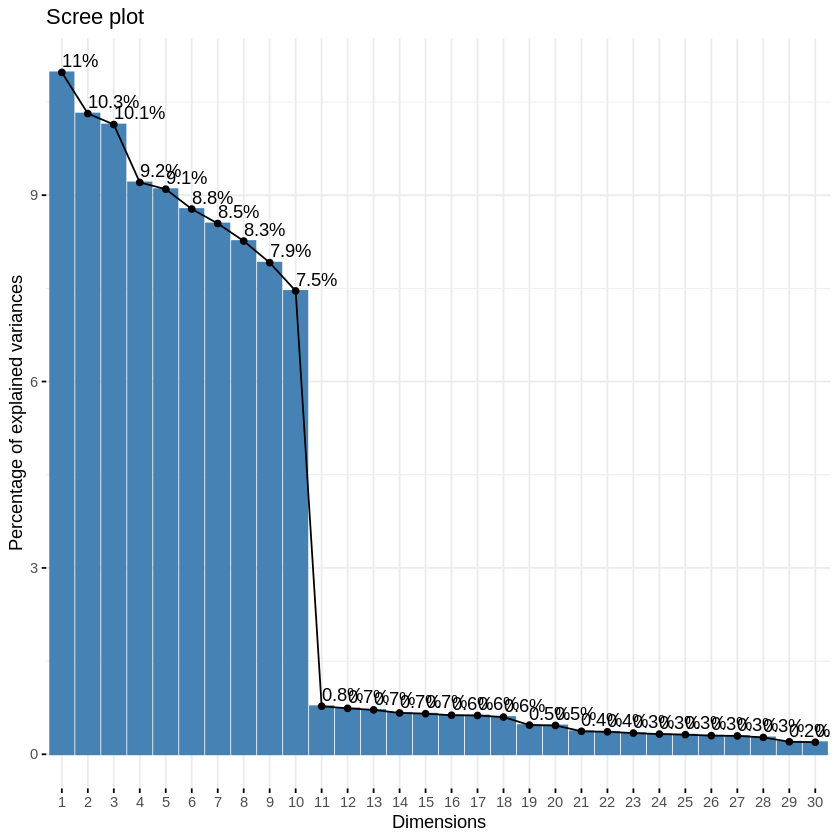

In [ ]:
fviz_eig(data.pca, addlabels = TRUE, ncp = 30)

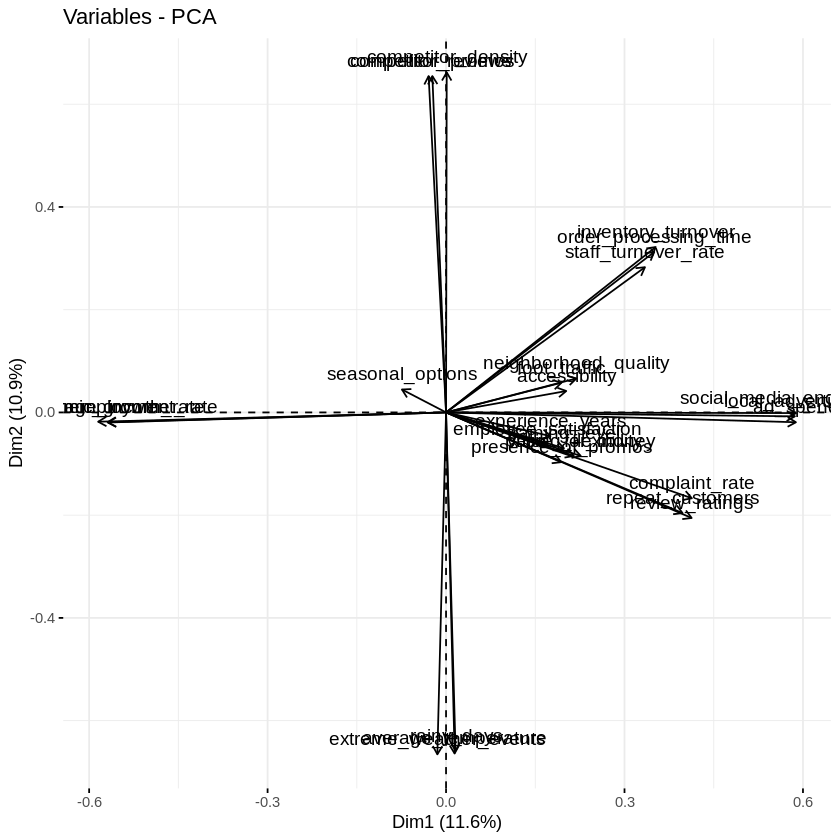

In [ ]:
# Graph of the variables
fviz_pca_var(data.pca, col.var = "black")

## **Regularization for Feature Selection**

Used star ratings for testing.

In [74]:
feats <- resto_train %>% select(-income, -star_ratings)
X <- as.matrix(feats)
y <- as.matrix(factor(resto_train$star_ratings))

model.ridge <- glmnet(x=X, y=y, family = "multinomial", alpha=0, lambda=10)
coef(model.ridge)

$`1`
31 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
                         2.670116e-01
accessibility            2.260941e-04
foot_traffic             1.723883e-04
neighborhood_quality     1.655279e-04
training_level          -8.484762e-05
experience_years        -7.542108e-05
employee_satisfaction   -5.349121e-05
menu_diversity          -1.898681e-03
seasonal_options        -1.835398e-03
vegetarian_options      -1.834474e-03
value_for_money         -1.192997e-04
presence_of_promos      -6.090356e-06
pricing_flexibility     -8.143611e-05
ad_spend                -3.072996e-06
social_media_engagement  5.552498e-05
local_advertising        1.197464e-05
review_ratings           6.844737e-05
repeat_customers         7.126128e-05
complaint_rate           1.425245e-04
competitor_density       1.358776e-04
competitor_promos        9.796846e-05
competitor_reviews       8.125667e-05
local_unemployment_rate -9.852848e-06
average_income           9.297372e-06
eco

In [6]:
model.lasso <- glmnet(x=X, y=y, family='multinomial', alpha=1, lambda=0.01)
coef(model.lasso)

$`1`
31 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
                        28.554462251
accessibility            0.003014999
foot_traffic             .          
neighborhood_quality     0.003437210
training_level           .          
experience_years         .          
employee_satisfaction    .          
menu_diversity          -0.194279688
seasonal_options        -0.177915357
vegetarian_options      -0.146613789
value_for_money          .          
presence_of_promos       .          
pricing_flexibility      .          
ad_spend                 .          
social_media_engagement  .          
local_advertising        .          
review_ratings           .          
repeat_customers         .          
complaint_rate           .          
competitor_density       0.011528566
competitor_promos        .          
competitor_reviews       .          
local_unemployment_rate  .          
average_income           .          
economic_growth_rate     .  

In [7]:
model.elnet <- glmnet(x=X, y=y, family='multinomial', alpha=0.9, lambda=0.01)
coef(model.elnet)

$`1`
31 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
                        27.173269623
accessibility            0.004359387
foot_traffic             .          
neighborhood_quality     0.003373782
training_level           .          
experience_years         .          
employee_satisfaction    .          
menu_diversity          -0.184065962
seasonal_options        -0.170215813
vegetarian_options      -0.143896934
value_for_money          .          
presence_of_promos       .          
pricing_flexibility      .          
ad_spend                 .          
social_media_engagement  .          
local_advertising        .          
review_ratings           .          
repeat_customers         .          
complaint_rate           .          
competitor_density       0.012352544
competitor_promos        .          
competitor_reviews       .          
local_unemployment_rate  .          
average_income           .          
economic_growth_rate     .  

## **Regularization with Cross Validation (Star Rating)**

This section contains the model building part for the cross-validated regularized models. This is for predicting the **star rating** of a restaurant. These models will be used for both feature selection (if applicable) and model prediction later on.

### **I. Ridge Regression**

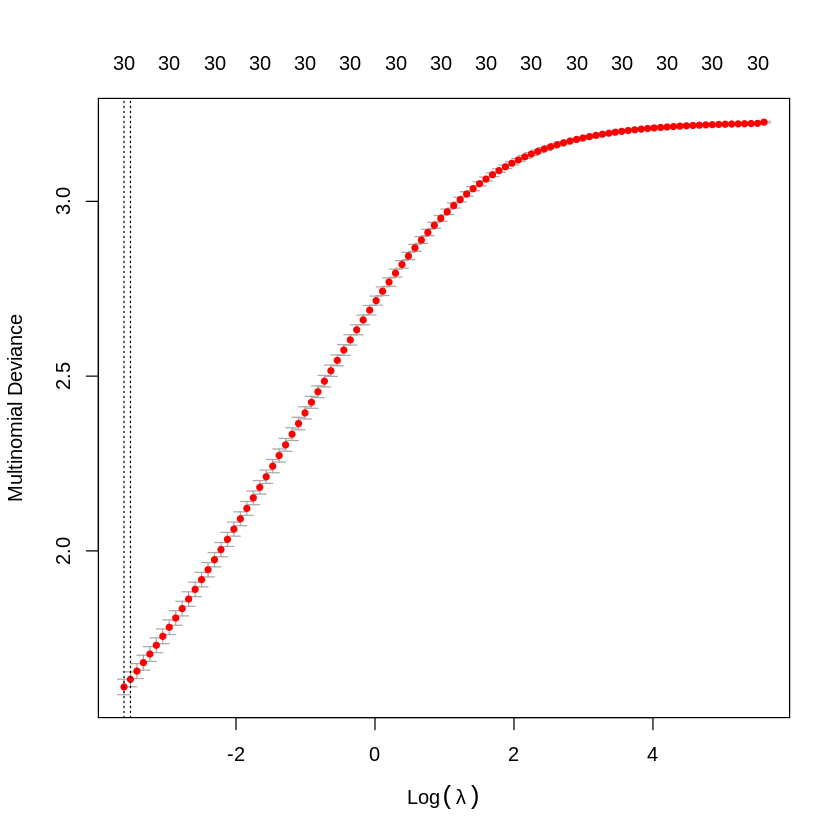

In [75]:
model.ridge <- cv.glmnet(x=X, y=y, family="multinomial", alpha=0)
plot(model.ridge)

In [25]:
model.ridge$lambda.min

[1] 0.0269962

In [33]:
# Extract the cross-validated error for the best lambda
model.ridge$cvm[model.ridge$lambda == model.ridge$lambda.min]

[1] 1.626686

In [79]:
model.ridge <- glmnet(x=X, y=y, family="multinomial", alpha=0, lambda=0.0269961993638942)
coef(model.ridge)

$`1`
31 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
                         1.424479e+01
accessibility            7.705309e-03
foot_traffic            -1.334363e-03
neighborhood_quality     5.875703e-03
training_level          -6.954383e-04
experience_years        -2.402598e-03
employee_satisfaction    1.933368e-03
menu_diversity          -9.799783e-02
seasonal_options        -9.357370e-02
vegetarian_options      -8.729765e-02
value_for_money         -5.087337e-03
presence_of_promos       5.505065e-03
pricing_flexibility     -6.188464e-03
ad_spend                -2.850989e-03
social_media_engagement  4.408249e-03
local_advertising        6.329222e-04
review_ratings          -8.569086e-05
repeat_customers         2.170030e-03
complaint_rate          -1.603503e-03
competitor_density       7.738117e-03
competitor_promos        2.737091e-03
competitor_reviews       2.417613e-03
local_unemployment_rate -2.137679e-04
average_income           4.377010e-03
eco

In [80]:
# Calculate the accuracy using the cross-validated predcitions
cv_predictions <- predict(model.ridge, X, s = "lambda.min", type = "class")

accuracy <- mean(cv_predictions == y)
accuracy

[1] 0.761

**Insight:**
- Keep all features if ridge regression will be used

### **II. LASSO Regression**

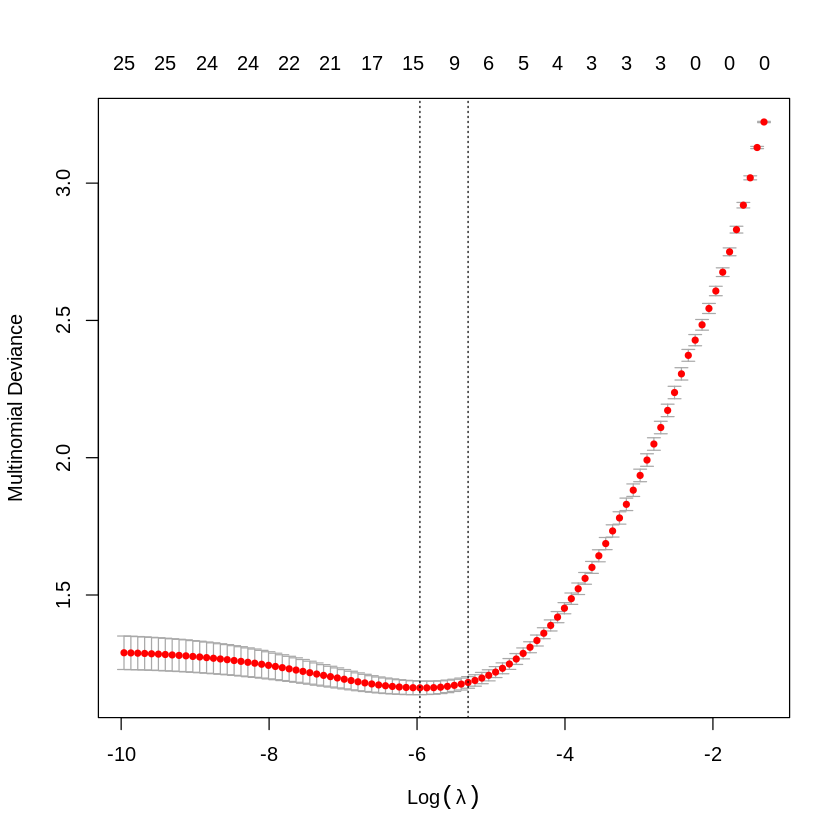

In [81]:
model.lasso <- cv.glmnet(x=X, y=y, family="multinomial", alpha=1)
plot(model.lasso)

In [82]:
model.lasso$lambda.min

[1] 0.002576918

In [83]:
# Extract the cross-validated error for the best lambda
model.lasso$cvm[model.lasso$lambda == model.lasso$lambda.min]

[1] 1.161774

In [84]:
model.lasso <- glmnet(x=X, y=y, family="multinomial", alpha=1, lambda=0.00257691804385404)
coef(model.lasso)

$`1`
31 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
                        46.4291736197
accessibility            0.0093193836
foot_traffic             .           
neighborhood_quality     0.0167393648
training_level           .           
experience_years         .           
employee_satisfaction    .           
menu_diversity          -0.3082796151
seasonal_options        -0.2985536396
vegetarian_options      -0.2401376643
value_for_money          .           
presence_of_promos       0.0003168043
pricing_flexibility     -0.0143795606
ad_spend                 .           
social_media_engagement  0.0051658558
local_advertising        0.0014162446
review_ratings           .           
repeat_customers         .           
complaint_rate          -0.0032341592
competitor_density       0.0249781399
competitor_promos        .           
competitor_reviews       0.0040033504
local_unemployment_rate  .           
average_income           .           
eco

In [85]:
# Calculate the accuracy using the cross-validated predcitions
cv_predictions <- predict(model.lasso, X, s = "lambda.min", type = "class")

accuracy <- mean(cv_predictions == y)
accuracy

[1] 0.78

**Insight:**
- Despite some features having their coefficients zeroed out using LASSO, if we consolidate all of the features being used for each class, we still have to keep all features if LASSO regression will be used

### **III. Elastic Net Regression**

In [65]:
alphalist <- seq(0, 1, by=0.05)
alphalist

[1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

In [45]:
elnet <- lapply(alphalist, function(x){
  cv.glmnet(x=X, y=y, family="multinomial", alpha=x)
})

In [46]:
for(i in 1:length(alphalist)){
  model <- elnet[[i]]
  print(paste0(
    "alpha: ", alphalist[i],
    ", lambda: ", model$lambda[which(model$cvm == min(model$cvm))],
    ", CV error: ", min(model$cvm)
  ))
}

[1] "alpha: 0, lambda: 0.0269961993638942, CV error: 1.61516949185988"
[1] "alpha: 0.05, lambda: 0.000859711674654689, CV error: 1.20185260995451"
[1] "alpha: 0.1, lambda: 0.000904805333533013, CV error: 1.20547269900779"
[1] "alpha: 0.15, lambda: 0.000875145077884208, CV error: 1.18658297170023"
[1] "alpha: 0.2, lambda: 0.00095226424826511, CV error: 1.19244300301386"
[1] "alpha: 0.25, lambda: 0.00100706983519577, CV error: 1.19485033134907"
[1] "alpha: 0.3, lambda: 0.00121757158238099, CV error: 1.21579559491797"
[1] "alpha: 0.35, lambda: 0.00114538569305363, CV error: 1.18836791229603"
[1] "alpha: 0.4, lambda: 0.00132486591869789, CV error: 1.1990646222501"
[1] "alpha: 0.45, lambda: 0.00129247885352423, CV error: 1.16497579531129"
[1] "alpha: 0.5, lambda: 0.00140111581930159, CV error: 1.18624828910916"
[1] "alpha: 0.55, lambda: 0.00153422633151032, CV error: 1.20221369196295"
[1] "alpha: 0.6, lambda: 0.00140637413721779, CV error: 1.17509552604835"
[1] "alpha: 0.65, lambda: 0.00156

In [86]:
model.elnet <- glmnet(x=X, y=y, family="multinomial", alpha=0.95, lambda=0.00205194105083094)
coef(model.elnet)

$`1`
31 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
                        48.093540242
accessibility            0.010168987
foot_traffic             .          
neighborhood_quality     0.018401838
training_level           .          
experience_years         .          
employee_satisfaction    .          
menu_diversity          -0.319036001
seasonal_options        -0.309130776
vegetarian_options      -0.248151336
value_for_money          .          
presence_of_promos       0.004144446
pricing_flexibility     -0.021632497
ad_spend                 .          
social_media_engagement  0.003910523
local_advertising        0.003751665
review_ratings           .          
repeat_customers         0.006333173
complaint_rate          -0.011836149
competitor_density       0.025490881
competitor_promos        .          
competitor_reviews       0.007254147
local_unemployment_rate  .          
average_income           .          
economic_growth_rate     .  

In [87]:
# Calculate the accuracy using the cross-validated predcitions
cv_predictions <- predict(model.elnet, X, s = "lambda.min", type = "class")

accuracy <- mean(cv_predictions == y)
accuracy

[1] 0.782

**Insight:**
- Same as LASSO
- Despite some features having their coefficients zeroed out using Elastic Net, if we consolidate all of the features being used for each class, we still have to keep all features if Elastic Net regression will be used

## **Generating Predictions (Star Rating)**

In [48]:
# Code for getting multi-class predictions (for star ratings)
predict(model.ridge, X, s = "lambda.min", type = "class")[1:10]

[1] "5" "1" "1" "5" "1" "5" "4" "1" "4" "3"

---
## **Regularization with Cross Validation (Income)**

This section contains the model building part for the cross-validated regularized models. This is for predicting the **income** of a restaurant. These models will be used for both feature selection (if applicable) and model prediction later on.

### **I. Ridge Regression**

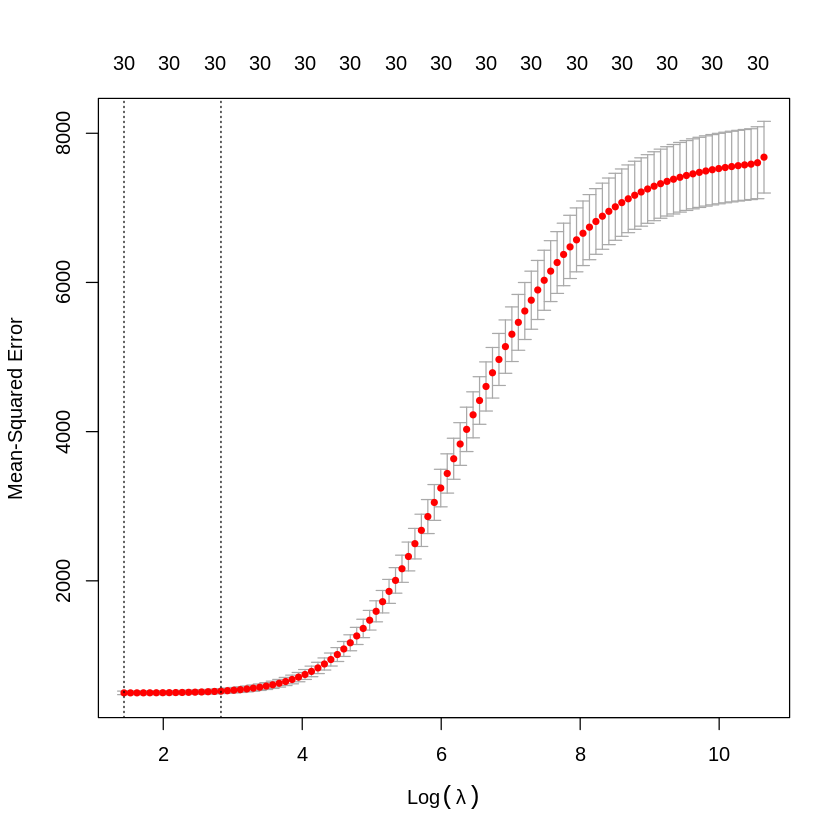

In [54]:
y <- as.matrix(resto_train$income)
model.ridge <- cv.glmnet(x=X, y=y, family="gaussian", alpha=0)
plot(model.ridge)

In [55]:
model.ridge$lambda.min

[1] 4.199464

In [56]:
# Extract the cross-validated error for the best lambda
model.ridge$cvm[model.ridge$lambda == model.ridge$lambda.min]

[1] 498.0077

In [57]:
model.ridge <- glmnet(x=X, y=y, family="gaussian", alpha=0, lambda=4.1994636818971)
coef(model.ridge)

31 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)             1085.6716482
accessibility              0.8668816
foot_traffic               0.8025995
neighborhood_quality       1.0324830
training_level             0.8818358
experience_years           0.8130440
employee_satisfaction      0.7395959
menu_diversity             0.5951993
seasonal_options           0.7290056
vegetarian_options         0.5636428
value_for_money            0.7263822
presence_of_promos         0.7602650
pricing_flexibility        0.6682921
ad_spend                   0.3773534
social_media_engagement    0.5496849
local_advertising          0.4990209
review_ratings             1.1472432
repeat_customers           1.0712226
complaint_rate             0.9321563
competitor_density        -0.4260848
competitor_promos         -0.2594066
competitor_reviews        -0.4891926
local_unemployment_rate    0.5569341
average_income             0.5623149
economic_growth_rate       0.5811

**Insight:**
- Keep all features if ridge regression will be used

### **II. LASSO Regression**

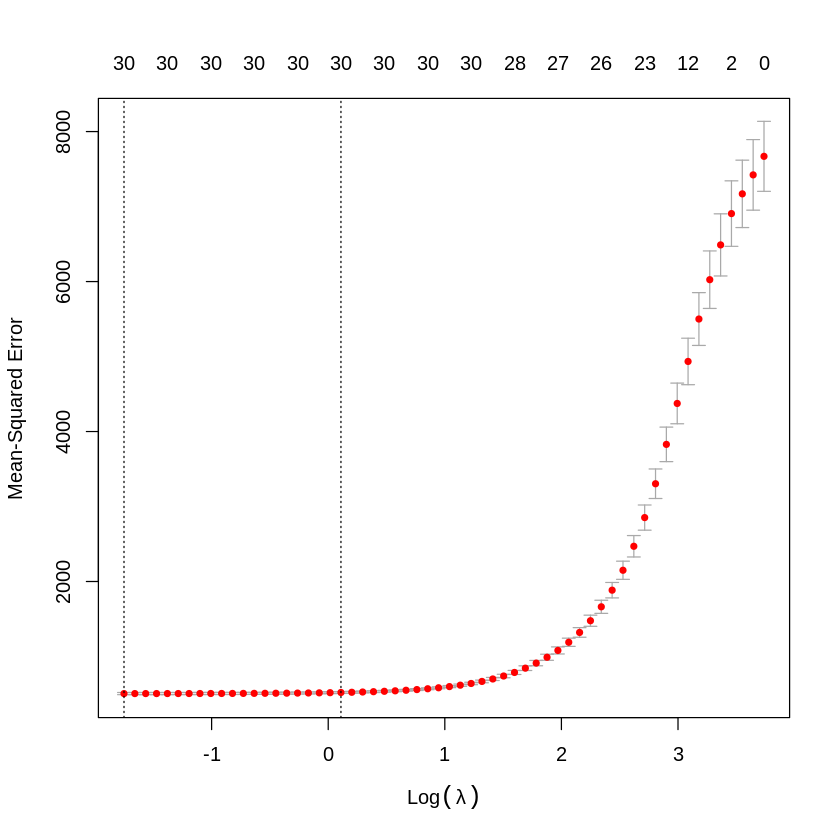

In [58]:
model.lasso <- cv.glmnet(x=X, y=y, family="gaussian", alpha=1)
plot(model.lasso)

In [59]:
model.lasso$lambda.min

[1] 0.1735224

In [60]:
# Extract the cross-validated error for the best lambda
model.lasso$cvm[model.lasso$lambda == model.lasso$lambda.min]

[1] 505.5555

In [61]:
model.lasso <- glmnet(x=X, y=y, family="gaussian", alpha=1, lambda=0.173522360074328)
coef(model.lasso)

31 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)             1074.6901366
accessibility              0.8696080
foot_traffic               0.7859042
neighborhood_quality       1.0825712
training_level             0.9170346
experience_years           0.8305175
employee_satisfaction      0.7146879
menu_diversity             0.5946439
seasonal_options           0.7720109
vegetarian_options         0.5376789
value_for_money            0.7377852
presence_of_promos         0.7783983
pricing_flexibility        0.6594936
ad_spend                   0.3190432
social_media_engagement    0.5924723
local_advertising          0.5240191
review_ratings             1.1761912
repeat_customers           1.0931654
complaint_rate             0.9211603
competitor_density        -0.4506629
competitor_promos         -0.1902897
competitor_reviews        -0.5398362
local_unemployment_rate    0.5515173
average_income             0.5697553
economic_growth_rate       0.6004

**Insight:**
- Despite using LASSO regression, the best performing model makes use of all features

### **III. Elastic Net Regression**

In [63]:
elnet <- lapply(alphalist, function(x){
  cv.glmnet(x=X, y=y, family="gaussian", alpha=x)
})

In [66]:
for(i in 1:length(alphalist)){
  model <- elnet[[i]]
  print(paste0(
    "alpha: ", alphalist[i],
    ", lambda: ", model$lambda[which(model$cvm == min(model$cvm))],
    ", CV error: ", min(model$cvm)
  ))
}

[1] "alpha: 0, lambda: 4.1994636818971, CV error: 495.367392064687"
[1] "alpha: 0.05, lambda: 2.39204463884728, CV error: 497.468496864299"
[1] "alpha: 0.1, lambda: 1.73522360074328, CV error: 499.974216144111"
[1] "alpha: 0.15, lambda: 1.05404741235326, CV error: 500.63234655529"
[1] "alpha: 0.2, lambda: 0.720306558987149, CV error: 500.189564375361"
[1] "alpha: 0.25, lambda: 0.632428447411957, CV error: 496.758626696153"
[1] "alpha: 0.3, lambda: 0.527023706176631, CV error: 497.603172565914"
[1] "alpha: 0.35, lambda: 0.495778171640938, CV error: 503.267172480009"
[1] "alpha: 0.4, lambda: 0.360153279493574, CV error: 500.169856524894"
[1] "alpha: 0.45, lambda: 0.351349137451087, CV error: 501.832995159918"
[1] "alpha: 0.5, lambda: 0.316214223705979, CV error: 500.724275361715"
[1] "alpha: 0.55, lambda: 0.287467476096344, CV error: 499.229263990112"
[1] "alpha: 0.6, lambda: 0.263511853088315, CV error: 500.956788903461"
[1] "alpha: 0.65, lambda: 0.24324171054306, CV error: 500.06221989

In [69]:
alphalist <- seq(0, 0.05, by=0.01)
alphalist

[1] 0.00 0.01 0.02 0.03 0.04 0.05

In [70]:
elnet <- lapply(alphalist, function(x){
  cv.glmnet(x=X, y=y, family="gaussian", alpha=x)
})
for(i in 1:length(alphalist)){
  model <- elnet[[i]]
  print(paste0(
    "alpha: ", alphalist[i],
    ", lambda: ", model$lambda[which(model$cvm == min(model$cvm))],
    ", CV error: ", min(model$cvm)
  ))
}


[1] "alpha: 0, lambda: 4.1994636818971, CV error: 500.76920623048"
[1] "alpha: 0.01, lambda: 4.29828135375999, CV error: 503.478369954454"
[1] "alpha: 0.02, lambda: 3.11803514305374, CV error: 497.488906396711"
[1] "alpha: 0.03, lambda: 2.50378957897302, CV error: 490.552161496838"
[1] "alpha: 0.04, lambda: 2.48239685365865, CV error: 493.004809047858"
[1] "alpha: 0.05, lambda: 2.88122623594859, CV error: 501.681974335228"


In [71]:
model.elnet <- glmnet(x=X, y=y, family="gaussian", alpha=0.03, lambda=2.50378957897302)
coef(model.elnet)

31 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)             1081.2721072
accessibility              0.8689443
foot_traffic               0.7964173
neighborhood_quality       1.0507589
training_level             0.8965572
experience_years           0.8181729
employee_satisfaction      0.7310827
menu_diversity             0.5907550
seasonal_options           0.7446624
vegetarian_options         0.5584555
value_for_money            0.7305162
presence_of_promos         0.7672859
pricing_flexibility        0.6654173
ad_spend                   0.3622533
social_media_engagement    0.5631090
local_advertising          0.5050003
review_ratings             1.1580609
repeat_customers           1.0804662
complaint_rate             0.9284263
competitor_density        -0.4352849
competitor_promos         -0.2377303
competitor_reviews        -0.5045256
local_unemployment_rate    0.5590273
average_income             0.5636931
economic_growth_rate       0.5865

**Insight:**
- Same as LASSO
- Despite using Elastic net regression, the best performing model makes use of all features